In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

In [40]:
data = pd.read_csv("data/heart.csv")
df = pd.DataFrame(data)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### EDA

In [41]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [43]:
df.shape

(918, 12)

In [44]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [45]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

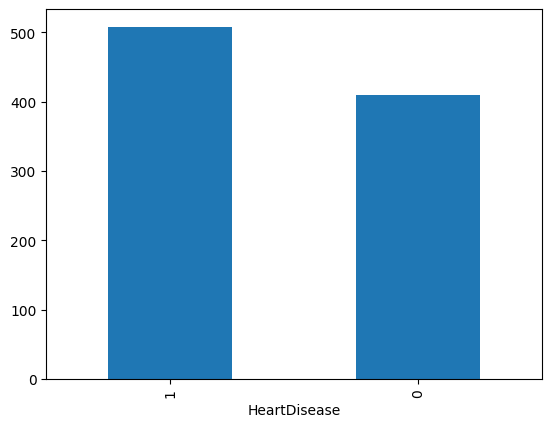

In [46]:
df["HeartDisease"].value_counts().plot(kind="bar")

In [47]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

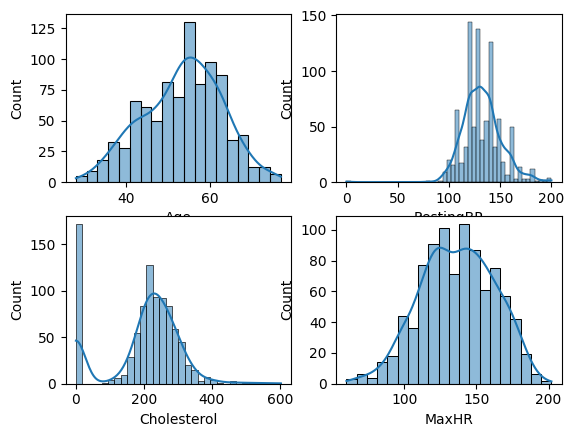

In [48]:
def plotting (var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

SOME VALUES ARE ZERO

In [49]:
ch_mean = df.loc[df["Cholesterol"] != 0 , "Cholesterol"].mean()
df["Cholesterol"] = df["Cholesterol"].replace(0,ch_mean).round(2)

ch_mean = df.loc[df["RestingBP"] != 0 , "RestingBP"].mean()
df["RestingBP"] = df["RestingBP"].replace(0,ch_mean).round(2)

<Axes: xlabel='Sex', ylabel='count'>

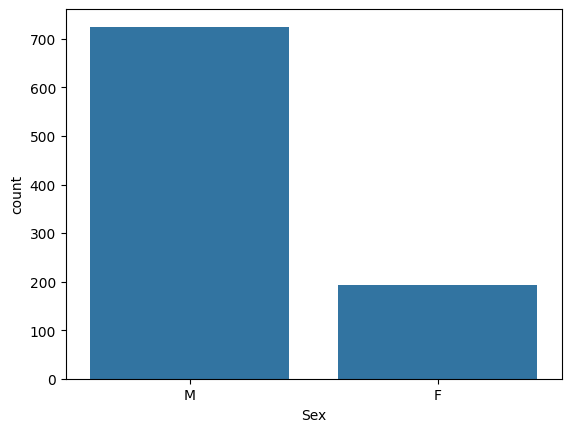

In [50]:
sns.countplot(x=df["Sex"])

<Axes: xlabel='ChestPainType', ylabel='count'>

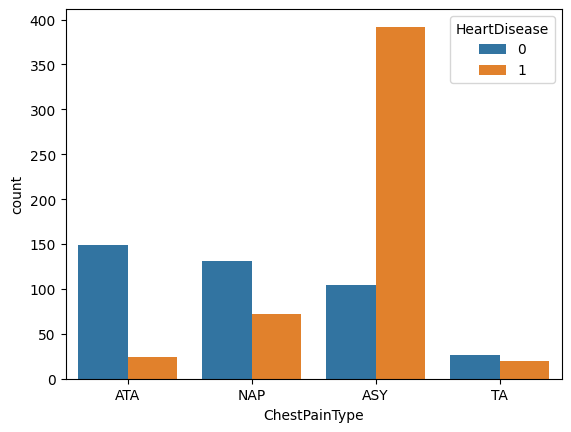

In [51]:
sns.countplot(x=df["ChestPainType"] , hue=df["HeartDisease"])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

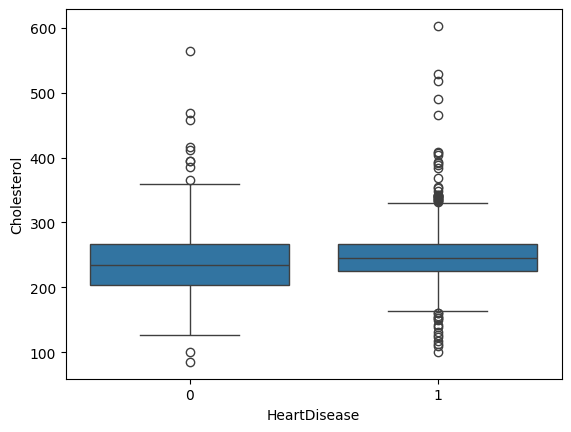

In [52]:
# BOX PLOT // NUMERICAL AND CATEGORICAL

sns.boxplot(x="HeartDisease" ,y="Cholesterol" , data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

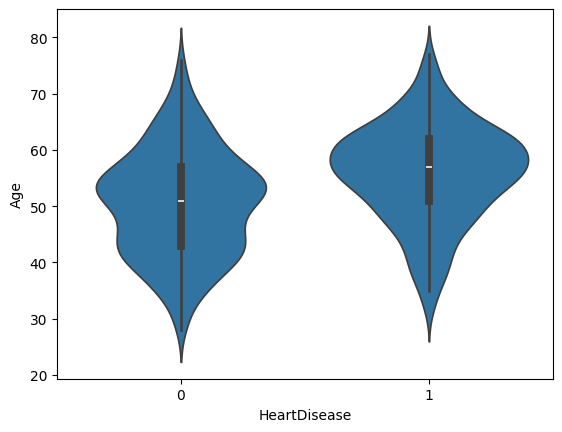

In [53]:
sns.violinplot(x="HeartDisease" , y="Age" , data=df)

### DATE PRE PROCESSIGN AND CLEANING

In [56]:
df_encode = pd.get_dummies(df,drop_first=True).astype(int)
df_encode.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [60]:
numeric_df = df.select_dtypes(include=["number"])
numeric_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140.0,289.0,0,172,0.0,0
1,49,160.0,180.0,0,156,1.0,1
2,37,130.0,283.0,0,98,0.0,0
3,48,138.0,214.0,0,108,1.5,1
4,54,150.0,195.0,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1
914,68,144.0,193.0,1,141,3.4,1
915,57,130.0,131.0,0,115,1.2,1
916,57,130.0,236.0,0,174,0.0,1


In [61]:
# STATNDARD SCALING

from sklearn.preprocessing import StandardScaler
numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]
scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(std_scaled, columns=numeric_cols)
print("StandardScaler:\n", scaled_df)

StandardScaler:
           Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.433140   0.414853     0.832513  -0.551341  1.382928 -0.832432   
1   -0.478484   1.527192    -1.212938  -0.551341  0.754157  0.105664   
2   -1.751359  -0.141317     0.719919  -0.551341 -1.525138 -0.832432   
3   -0.584556   0.303619    -0.574908  -0.551341 -1.132156  0.574711   
4    0.051881   0.971022    -0.931454  -0.551341 -0.581981 -0.832432   
..        ...        ...          ...        ...       ...       ...   
913 -0.902775  -1.253656     0.363372  -0.551341 -0.188999  0.293283   
914  1.536902   0.637321    -0.968986   1.813758  0.164684  2.357094   
915  0.370100  -0.141317    -2.132453  -0.551341 -0.857069  0.293283   
916  0.370100  -0.141317    -0.162065  -0.551341  1.461525 -0.832432   
917 -1.645286   0.303619    -1.306766  -0.551341  1.422226 -0.832432   

     HeartDisease  
0       -1.113115  
1        0.898380  
2       -1.113115  
3        0.898380  
4       -1.113115 